# Analysis for Continuous Improvement

Author Name: Miguel Villasenor

9-digit PID: 730472629

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template "The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. Make students interact with UTAs more - this whill benefit students as they will have a strong connection with their UTA and feel more comfortable to seek their help.
2. UTA's teach instead on asynch days - Students will benefit from having someone guiding them as opposed to students doing it on their own. UTAs will also benefit as they will gain experience in teaching others, some might enjoy it so much that we may finally have more compsci professors in the future!
3. Post-lesson questions should allow 1 retry a week after lesson date - this would benefit students as they can boost their grades but also help Kris because he will be able to more accurately see how well students understand the content after learning AND applying it for a week.
4. more exercises that are variations of previous ones, for more practice - this would benefit students as they would have increased coding practice on specific topics covered in class.
5. optional and *fun* assignments that serve as more practice - this would benefit students (specifically CompSci majors) as they would not only be provided with more guided practice with coding, but they will be more excited for compsci as these optional assignment can be more fun (like the wordle game). 

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

1. Idea without sufficient data to analyze:
    * Make students interact with UTAs more
    * UTA's teach on asynch days rather than yt videos
    * Post-lesson questions should allow 1 retry a week after lesson date
    

2. Suggestion for how to collect data to support this idea in the future:
    * questions on how close students are to UTA's and if more individual help would be beneficial
    * questions on if students understand why they got answers wrong after seeing their gradescope answers after a week of applying lesson material. 

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

1. Idea to analyze with available data:
    * optional and *fun* assignments that serve as more practice
2. This idea is more valuable than the others brainstormed because: 
    * time spent coding, i believe, has a direct correlation with understanding the material in this course and will also serve to make the class a lot more enjoyable for students.


## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interleave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [48]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`.

## Here I use `Read_csv_rows` to read the cvs file into a 'table'

In [49]:
from data_utils import read_csv_rows
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"
data_rows: list[dict[str,str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)

## Now I will create a new row-oriented table comprised of only participants who intened to major (or intended to minor when it was an option) using my `select_values` function

In [50]:
from data_utils import select_values
comp_major_rows: list[dict[str,str]] = select_values(data_rows, 'comp_major', 'No')


## Transform row-oriented table into column-oriented table using `columnar`

In [51]:
from data_utils import columnar
data_cols: dict[str, list[str]] = columnar(comp_major_rows)

## Now I will `select` the prior_exp, ap_principles, ap_a, prior_time, and difficulty columns and produce a table with only this data to conceptualize the experience level of comp110 students. 

In [52]:
list_select: list[str] = ["prior_exp", "ap_principles", "ap_a", "prior_time", "difficulty"]
from data_utils import select
selected_data: dict[str, list[str]] = select(data_cols, list_select)


## Make sure I am on the right track using the `head` function

In [53]:
from data_utils import head
selected_data_head: dict[str, list[str]] = head(selected_data, 5)
print(selected_data_head)

{'prior_exp': ['None to less than one month!', '2-6 months', 'None to less than one month!', '2-6 months', '2-6 months'], 'ap_principles': ['', 'No', '', 'No', 'Yes'], 'ap_a': ['', 'No', '', 'No', 'No'], 'prior_time': ['', 'None to less than one month!', '', '1 month or so', '7-12 months'], 'difficulty': ['4', '4', '5', '3', '4']}


## Now I will produce a dictionary with the `count` of my the values of my selected data

In [54]:
from data_utils import count, select

prior_exp_count: dict[str, int] = count(selected_data['prior_exp'])
print(f"PRIOR EXPERINCE: {prior_exp_count.items()}")

ap_principles_count: dict[str, int] = count(selected_data['ap_principles'])
print(f"COMPLETED AP COMP SCI PRINCIPLES: {ap_principles_count}")

ap_a_count: dict[str, int] = count(selected_data['ap_a'])
print(f"COMPLETED AP COMP SCI {ap_a_count}")

prior_time_count: dict[str, int] = count(selected_data['prior_time'])
print(f"AMT. TIME SELF-DIRECTED PROGRAMMING: {prior_time_count}")

difficulty_count: dict[str, int] = count(selected_data['difficulty'])
print(f"DIFFICULTY: {difficulty_count}")

PRIOR EXPERINCE: dict_items([('None to less than one month!', 115), ('2-6 months', 91), ('7-12 months', 40), ('1-2 years', 23), ('Over 2 years', 16)])
COMPLETED AP COMP SCI PRINCIPLES: {'': 115, 'No': 102, 'Yes': 68}
COMPLETED AP COMP SCI {'': 115, 'No': 119, 'Yes': 51}
AMT. TIME SELF-DIRECTED PROGRAMMING: {'': 115, 'None to less than one month!': 54, '1 month or so': 53, '7-12 months': 13, '2-6 months': 39, '1-2 years': 5, '> 2 years': 6}
DIFFICULTY: {'4': 77, '5': 58, '3': 49, '2': 44, '6': 28, '1': 21, '7': 8}


## Now I will sort each dictionary into a logical order using my function `reorder_list` and leaving out blank answers

In [55]:
from data_utils import reorder_list

desired_order = ['None to less than one month!', '1 month or so', '2-6 months', '7-12 months', '1-2 years', '> 2 years']
prior_time_count = reorder_list(prior_time_count, desired_order)

desired_order = ['1', '2', '3', '4', '5', '6', '7']
difficulty_count = reorder_list(difficulty_count, desired_order)

desired_order = ['No', 'Yes']
ap_principles_count = reorder_list(ap_principles_count, desired_order)

desired_order = ['No', 'Yes']
ap_a_count = reorder_list(ap_a_count, desired_order)

## Now I produce a bar chart for each list using `matplotlib`

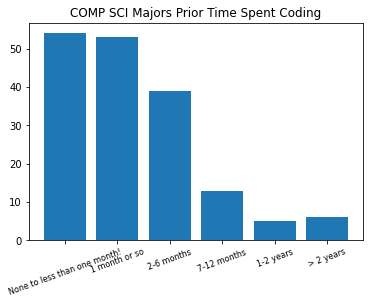

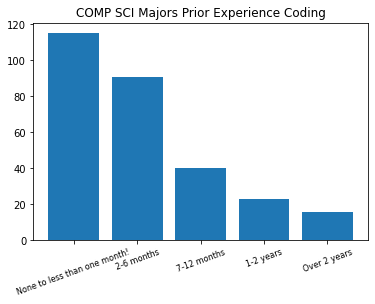

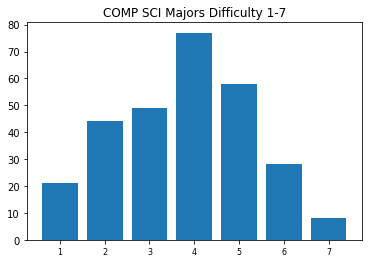

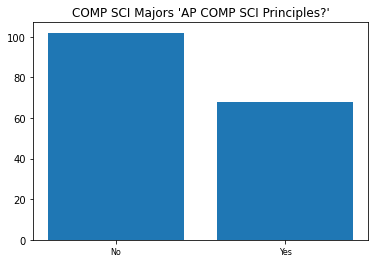

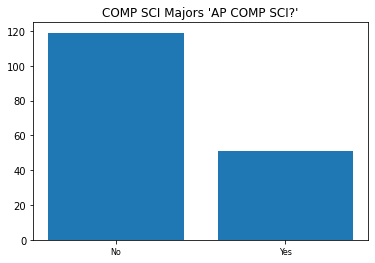

In [60]:
from matplotlib import pyplot as plt 

x = prior_time_count.keys()
y = prior_time_count.values()
plt.tick_params(axis='x', labelrotation = 20, labelsize = 8)
plt.title('COMP SCI Majors Prior Time Spent Coding')
plt.bar(x, y)
plt.show()


x = prior_exp_count.keys()
y = prior_exp_count.values()
plt.tick_params(axis='x', labelrotation = 20, labelsize = 8)
plt.title('COMP SCI Majors Prior Experience Coding')
plt.bar(x, y)
plt.show()

x = difficulty_count.keys()
y = difficulty_count.values()
plt.tick_params(axis='x', labelsize = 8)
plt.title('COMP SCI Majors Difficulty 1-7')
plt.bar(x, y)
plt.show()

x = ap_principles_count.keys()
y = ap_principles_count.values()
plt.tick_params(axis='x', labelsize = 8)
plt.title('COMP SCI Majors \'AP COMP SCI Principles?\'')
plt.bar(x, y)
plt.show()

x = ap_a_count.keys()
y = ap_a_count.values()
plt.tick_params(axis='x', labelsize = 8)
plt.title('COMP SCI Majors \'AP COMP SCI?\'')
plt.bar(x, y)
plt.show()










In [57]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysys results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion



#### My analysis of the data has shown that students in COMP 110 (specifically those that plan to major/minor in COMP SCI) have minimal prior experience in coding. Time spent coding has a direct effect on the ability to code, so giving students the resources to be able to practice coding would not only increase their scores but make sure they have a solid foundation on which to build in their future coding courses. This becomes more evident when viewing the graphs I produced, which show that a majority of students (specifically those that plan to major in computer science) have less than 6 months of experience coding and have not taken AP Comp Sci. Additionally, a majority of students in COMP 110 who want to major in COMP SCI report the difficulty to be around 3-6, and this should be taken into account if providing additional coding practice for students. My solution would be to offer optional extra practice that solidifies the topics covered in class and perhaps incorporates new topics that are interesting/beneficial. My analysis could be refined by including data from students who do not plan to major in compsci and analyze if they would also benefit from increased practice or if increased practice would make the course too difficult. 